# Ecoli on maltose

In [34]:
from datetime import datetime
import os
# from mscommfitting import MSCommFitting
print(os.chdir('C:/Users/Andrew Freiburger/Documents/Argonne/ProjectNotebooks/CommunityModeling/CommFitting/Ecoli_maltose'))
%run ../mscommfitting.py
mscommfit2 = MSCommFitting(phenotypes_csv_path = 'PhenotypeStoichiometry.csv', 
                           signal_tsv_paths = {'GFP_pf-ec_4-29-22.txt':'ecoli', 'OD_pf-ec_4-29-22.txt':'OD'},
                           media_conc_path = 'media_conc.csv',
                           carbon_conc_series = {'rows': {
                               'cpd00179': {'B':5, 'C': 5, 'D':5, 'E': 5, 'F': 5, 'G': 5},
                               }},
                           ignore_trials = {'rows': ['C', 'G', 'F']},
                           zip_path='mscomfit.zip')
print(datetime.today())
mscommfit2.define_problem(parameters={'v':1000})
print(datetime.today())

None
The ['rxn name', 'rxn'] columns were dropped from the phenotypes CSV.
The ['pf_acetate', 'pf_4HB', 'pf_stationary'] phenotypes were removed since their species is not among those that are defined with data: ['ecoli'].
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the ecoli measurements.
The ['B2', 'B3', 'B12', 'D2', 'D12', 'E12'] trials were removed from the ecoli measurements, with their deviation over time being less than the threshold of 2.
The ['C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12'] trials were dropped from the OD measurements.
2022-07-10 14:32:12.439321
Done with biomass loop: 0.25364583333333335 min
Done with metabolites l

{'trial': 'B2', 'content': 'biomass', 'species': 'ecoli', 'phenotype': 'malt'}
cvf_ecoli_malt
cvt_ecoli_malt
b_ecoli_malt
2
g_ecoli_malt
cvf_ecoli_acetate
cvt_ecoli_acetate
b_ecoli_acetate
g_ecoli_acetate
b_ecoli_stationary
g_ecoli_stationary


FeasibilityError: The solution is sub-optimal, with a infeasible status.

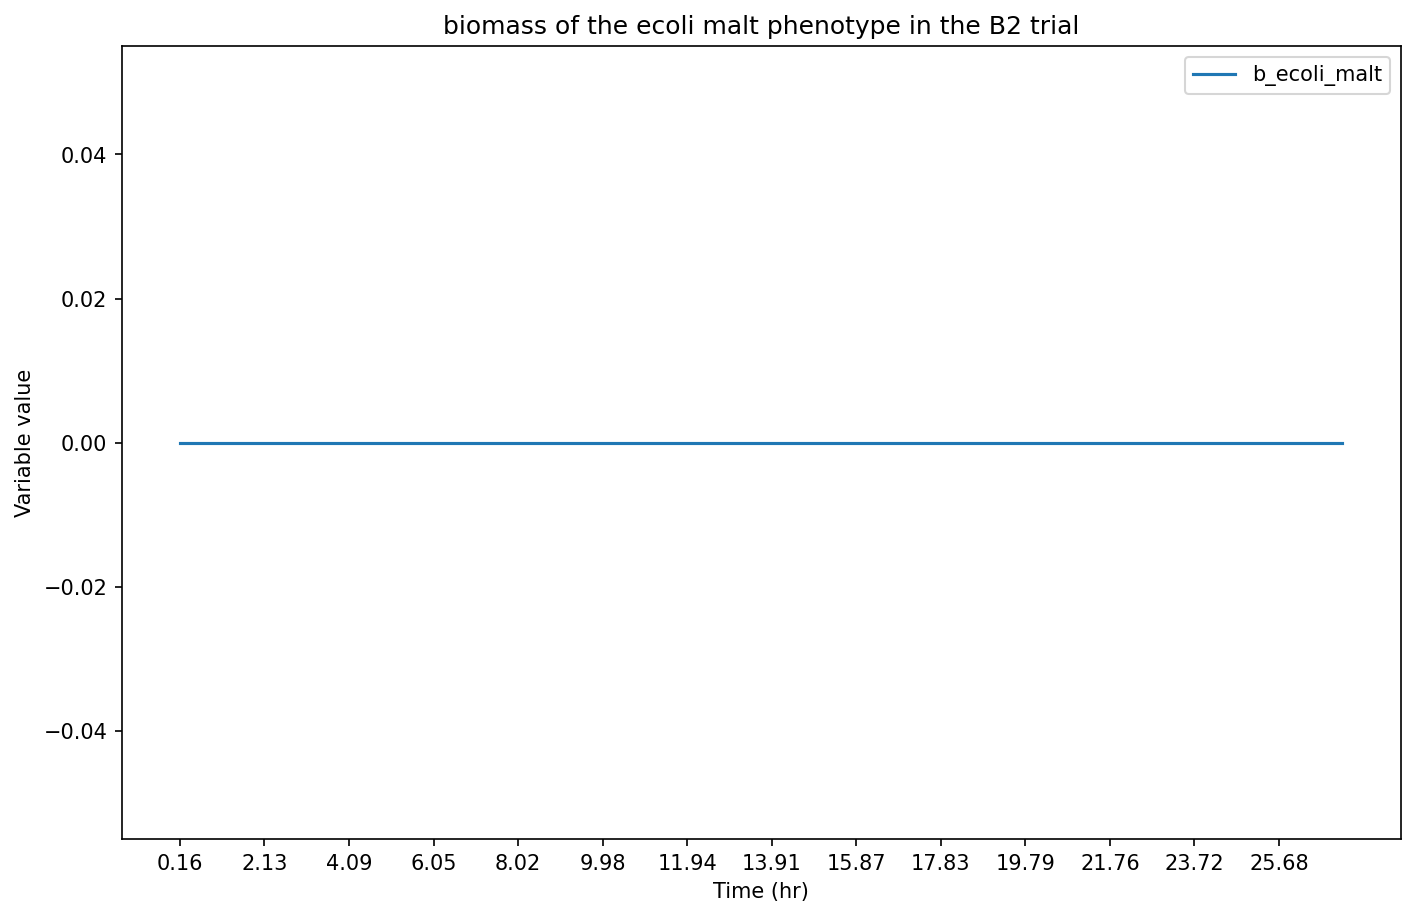

In [39]:
# plot the content for desired trials 
mscommfit2.plots = []
graphs = [
    {
        'trial':'B2',
        'content': 'biomass',
        'species': 'ecoli',
        'phenotype': 'malt'
    }
]

%time mscommfit2.compute(graphs)

In [2]:
# plot the content for desired trials 
graphs = [
    {
        'trial':'B2',
        'content': 'biomass',
        'species': 'ecoli',
        'phenotype': 'acetate'
    },
    {
        'trial':'B2',
        'content': 'growth',
        'species': 'ecoli',
        'phenotype': 'acetate'
    }   
]

%time mscommfit2.compute(graphs)

SubOptimalError: The solution is sub-optimal, with a infeasible status.

In [5]:
print(mscommfit2.problem.objective.value)

669.3243680459151


In [27]:
from pprint import pprint
from json import dump
values = {}
for variable, value in mscommfit2.problem.primal_values.items():
    if 'conversion' not in variable:
        basename, time, trial = variable.split('-')
        time = int(time)*.2
        if not trial in values:
            values[trial]:dict = {}
        if not basename in values[trial]:
            values[trial][basename]:dict = {}
        values[trial][basename][time] = value
        
mscommfit2.values = values
mscommfit2.zip_contents = []
for index, val in enumerate(mscommfit2.values):
    if val == 'B4':
        print(val); pprint(mscommfit2.values[val])
        with open('B4_primals.json', 'w') as out:
            dump(mscommfit2.values[val], out, indent=2)
        break

B4
{'GFP__bio': {0.2: 0.0,
              0.4: 0.0,
              0.6000000000000001: 0.0,
              0.8: 0.0,
              1.0: 0.0,
              1.2000000000000002: 0.0,
              1.4000000000000001: 0.0,
              1.6: 0.0,
              1.8: 0.0,
              2.0: 0.0,
              2.2: 0.0,
              2.4000000000000004: 0.0,
              2.6: 0.0,
              2.8000000000000003: 0.0,
              3.0: 0.0,
              3.2: 0.0,
              3.4000000000000004: 0.0,
              3.6: 0.0,
              3.8000000000000003: 0.0,
              4.0: 0.0,
              4.2: 0.0,
              4.4: 0.0,
              4.6000000000000005: 0.0,
              4.800000000000001: 0.0,
              5.0: 0.0,
              5.2: 0.0,
              5.4: 0.0,
              5.6000000000000005: 0.0,
              5.800000000000001: 0.0,
              6.0: 0.0,
              6.2: 0.0,
              6.4: 0.0,
              6.6000000000000005: 0.0,
              6.80000000000

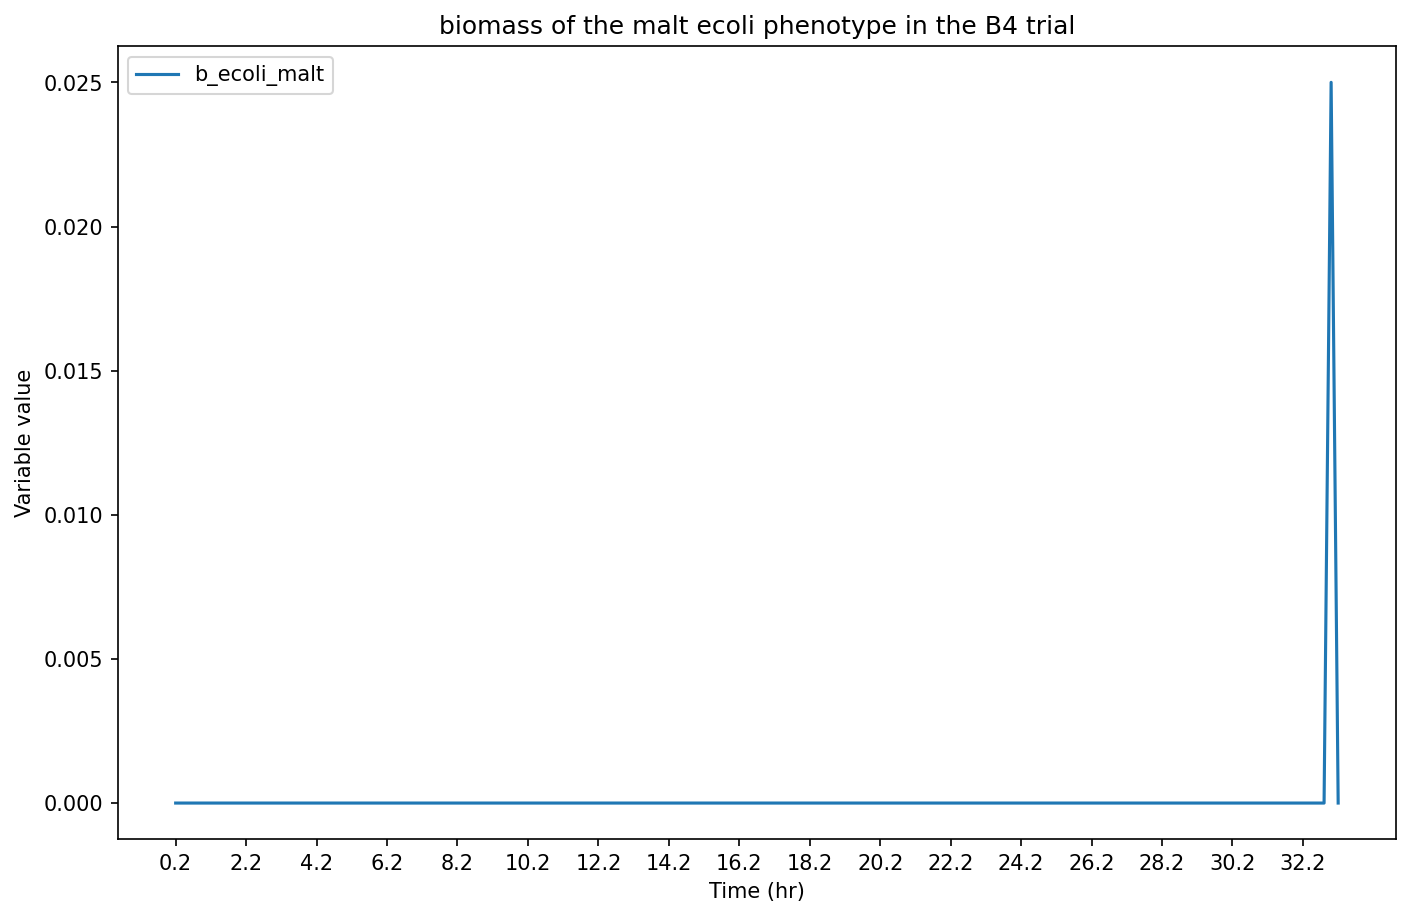

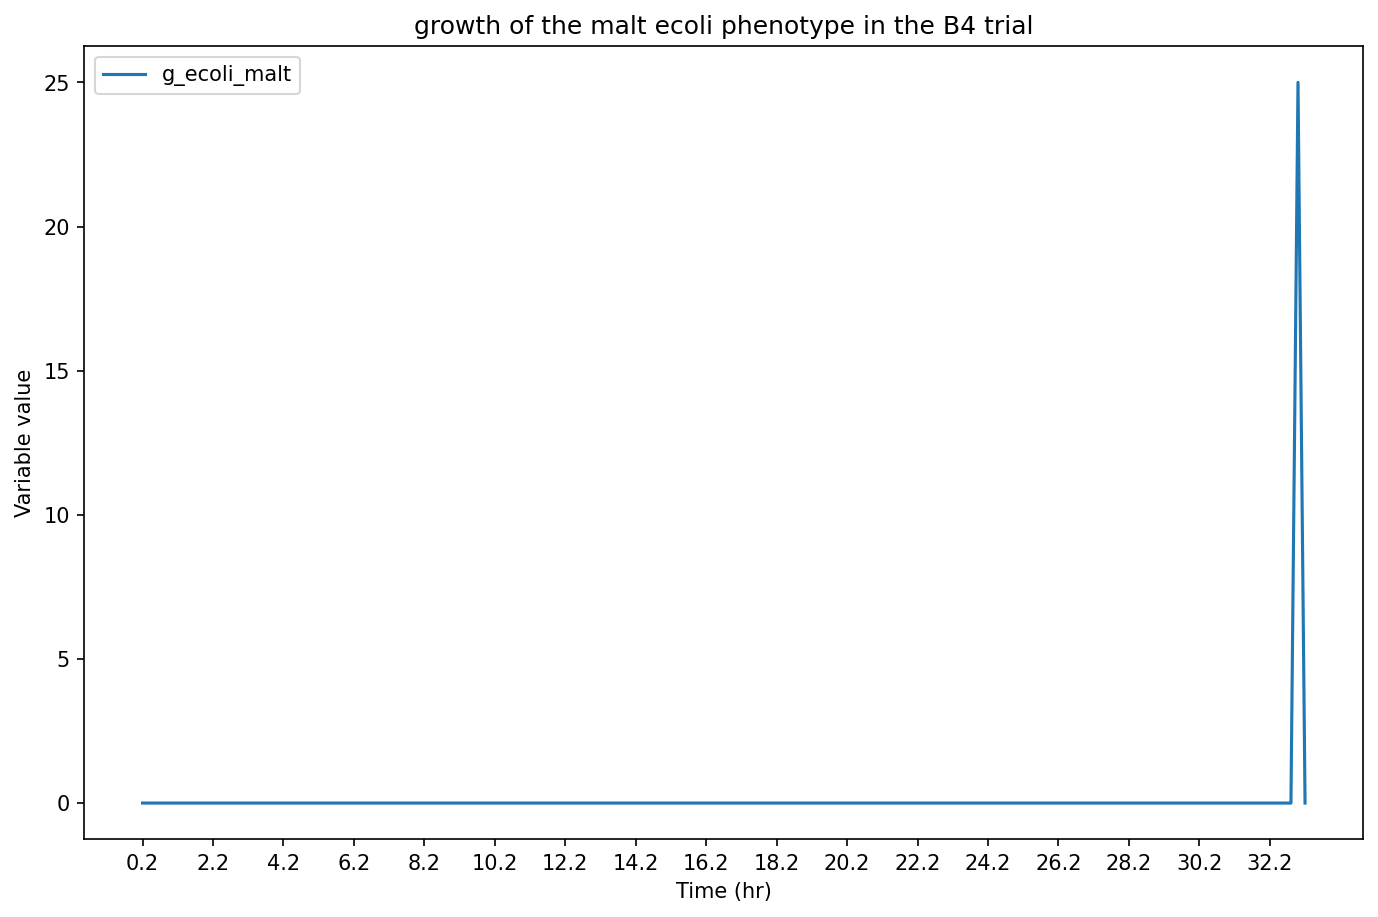

In [25]:
graphs = [
    {
        'trial':'B4',
        'content': 'biomass',
        'species': 'ecoli',
        'phenotype': 'malt'
    },
    {
        'trial':'B4',
        'content': 'growth',
        'species': 'ecoli',
        'phenotype': 'malt'
    }   
]
mscommfit2.graph(graphs)